In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
print(tf.__version__)

2.0.0-rc1


In [3]:
mnist = tf.keras.datasets.mnist #28x28 images of hand-written

In [4]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

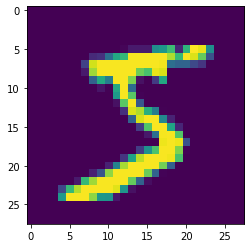

In [5]:
plt.imshow(x_train[0])
plt.show()

In [6]:
#normalization data
x_train = tf.keras.utils.normalize(x_train, axis=1)
x_test = tf.keras.utils.normalize(x_test, axis=1)

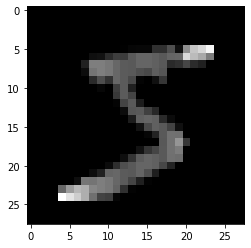

In [7]:
plt.imshow(x_train[0], cmap='gray')
plt.show()

In [8]:
#creating model
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax))

In [9]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [10]:
model.fit(x_train, y_train, epochs=10)

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 5s 89us/sample - loss: 0.2631 - accuracy: 0.9219
Epoch 2/10
60000/60000 [==============================] - 5s 88us/sample - loss: 0.1078 - accuracy: 0.9667
Epoch 3/10
60000/60000 [==============================] - 5s 82us/sample - loss: 0.0754 - accuracy: 0.9764
Epoch 4/10
60000/60000 [==============================] - 6s 93us/sample - loss: 0.0552 - accuracy: 0.9822
Epoch 5/10
60000/60000 [==============================] - 7s 112us/sample - loss: 0.0417 - accuracy: 0.9865
Epoch 6/10
60000/60000 [==============================] - 7s 110us/sample - loss: 0.0344 - accuracy: 0.9893
Epoch 7/10
60000/60000 [==============================] - 7s 110us/sample - loss: 0.0269 - accuracy: 0.9912
Epoch 8/10
60000/60000 [==============================] - 7s 114us/sample - loss: 0.0208 - accuracy: 0.9928
Epoch 9/10
60000/60000 [==============================] - 7s 112us/sample - loss: 0.0198 - accuracy: 0.9933
Epoch 10/

In [11]:
val_loss, val_acc = model.evaluate(x_test, y_test)
print(val_loss, val_acc)

10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

In [12]:
model.save('epic.model')

W0117 19:36:11.054296 4709289408 deprecation.py:506] From /Users/spiedy/anaconda3/lib/python3.7/site-packages/tensorflow_core/python/ops/resource_variable_ops.py:1781: calling BaseResourceVariable.__init__ (from tensorflow.python.ops.resource_variable_ops) with constraint is deprecated and will be removed in a future version.
Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [13]:
new_model = tf.keras.models.load_model('epic.model')

In [14]:
predicts = new_model.predict([x_test])

In [15]:
print(np.argmax(predicts[0]))

7


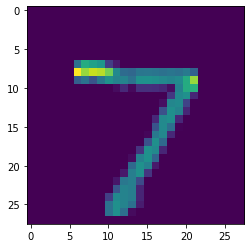

In [16]:
plt.imshow(x_test[0])
plt.show()

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            multiple                  0         
_________________________________________________________________
dense (Dense)                multiple                  100480    
_________________________________________________________________
dense_1 (Dense)              multiple                  16512     
_________________________________________________________________
dense_2 (Dense)              multiple                  1290      
Total params: 118,282
Trainable params: 118,282
Non-trainable params: 0
_________________________________________________________________
